In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# a) Función de transición
def transition_function(rule_number):
    rule_binary = np.binary_repr(rule_number, width=8)
    rule_map = {}
    for i, output in enumerate(reversed(rule_binary)):
        input_pattern = np.binary_repr(i, width=3)
        rule_map[input_pattern] = int(output)
    print("rule_map: ", rule_map)
    return rule_map

# b) Fronteras
def apply_boundary_conditions(state, boundary_type):
    if boundary_type == 'fixed':
        return np.concatenate(([0], state, [0]))
    elif boundary_type == 'periodic':
        return np.concatenate((state[-1:], state, state[:1]))

# c) Tamaño
def cellular_automaton(rule_number, initial_state, time_steps, boundary_type):
    rule_map = transition_function(rule_number)
    grid = np.zeros((time_steps, len(initial_state)), dtype=int)
    grid[0] = initial_state

    for t in range(1, time_steps):
        extended_state = apply_boundary_conditions(grid[t-1], boundary_type)
        for i in range(len(initial_state)):
            local_state = ''.join(map(str, extended_state[i:i+3]))
            grid[t, i] = rule_map[local_state]

    return grid

# d) Condiciones iniciales
def initial_conditions(size, condition_type, custom_state=None):
    if condition_type == 'random':
        return np.random.randint(2, size=size)
    elif condition_type == 'fixed':
        state = np.zeros(size, dtype=int)
        state[size // 2] = 1
        return state
    elif condition_type == 'custom':
        if custom_state is not None:
            return np.array(custom_state, dtype=int)

# e) Salida gráfica
def plot_grid(grid):
    plt.imshow(grid, cmap='binary')
    plt.show()


In [ ]:
rule_number = int(input("Introduce el número de regla en el intervalo [0, 255]: "))


rule_map:  {'000': 0, '001': 0, '010': 0, '011': 0, '100': 0, '101': 0, '110': 0, '111': 0}


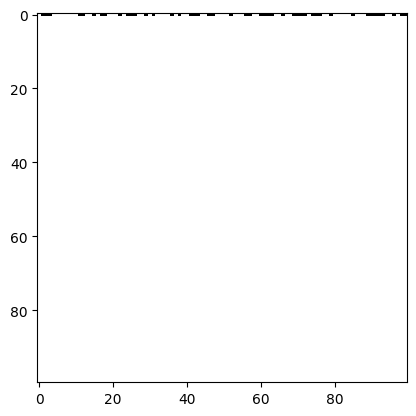

In [54]:
rule_number = 0
time_steps = 100
boundary_type = 'periodic'  # Opciones: 'fixed', 'periodic'
condition_type = 'random'  # Opciones: 'random', 'fixed', 'custom'
custom_state = None  # Usar sólo si condition_type es 'custom'

initial_state = initial_conditions(size, condition_type, custom_state)
grid = cellular_automaton(rule_number, initial_state, time_steps, boundary_type)
plot_grid(grid)

rule_map:  {'000': 0, '001': 1, '010': 1, '011': 1, '100': 1, '101': 0, '110': 0, '111': 0}
Regla 30


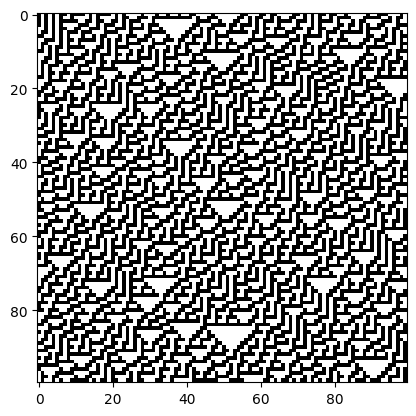

rule_map:  {'000': 0, '001': 1, '010': 1, '011': 0, '100': 1, '101': 1, '110': 0, '111': 0}
Regla 54


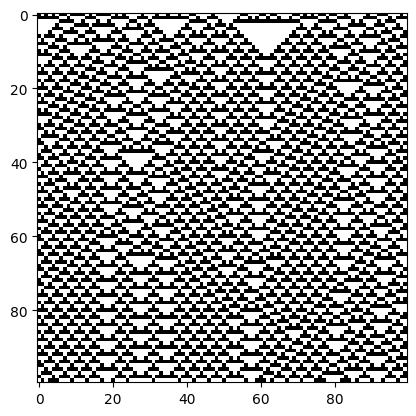

rule_map:  {'000': 0, '001': 1, '010': 1, '011': 1, '100': 0, '101': 1, '110': 1, '111': 0}
Regla 110


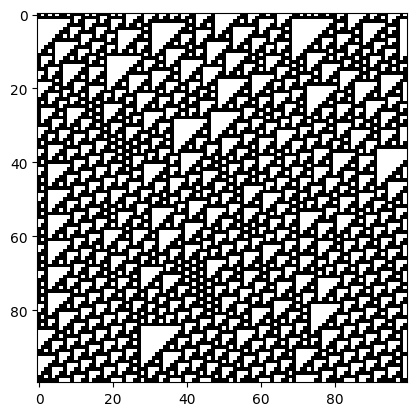

rule_map:  {'000': 0, '001': 0, '010': 0, '011': 1, '100': 1, '101': 1, '110': 0, '111': 1}
Regla 184


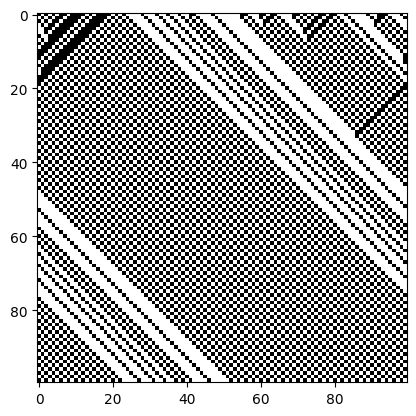

In [29]:

size = 100
time_steps = 100
boundary_type = 'periodic'  # Opciones: 'fixed', 'periodic'
condition_type = 'random'  # Opciones: 'random', 'fixed', 'custom'
custom_state = None  # Usar sólo si condition_type es 'custom'
initial_state = initial_conditions(size, condition_type, custom_state)
for rule_number in [30, 54, 110, 184]:
    grid = cellular_automaton(rule_number, initial_state, time_steps, boundary_type)
    print(f"Regla {rule_number}")
    plot_grid(grid)

In [ ]:

size =35
time_steps = 100
boundary_type = 'periodic'
condition_type = 'fixed' 
custom_state = None 

initial_state = initial_conditions(size, condition_type, custom_state)
grid = cellular_automaton(rule_number, initial_state, time_steps, boundary_type)
plot_grid(grid)

In [ ]:
rule_number = 30
size = 100
time_steps = 100
boundary_type = 'periodic' 
condition_type = 'custom' 
custom_state = [0] * size
custom_state[size // 2] = 1 #
